In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import time
import pickle
from imblearn.pipeline import Pipeline

# Machine Learning Models
!pip install catboost
from catboost import CatBoostClassifier

# Model Evaluation Metrics
from sklearn.metrics import (accuracy_score, f1_score, log_loss, recall_score, precision_score)

# Learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
# Khởi tạo mô hình CatBoost
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.05, l2_leaf_reg=3, early_stopping_rounds = 10, verbose=100, random_state=42)

In [ ]:
# Create the pipeline
pipeline = Pipeline(steps=[('catboost_model ', catboost_model )])

In [ ]:
with open('customer_classìication_model.pkl', 'wb') as picklefile:
    pickle.dump(pipeline, picklefile)

In [ ]:
# Tải mô hình
with open('customer_classìication_model.pkl', 'rb') as f:
    loaded_model_fitted = pickle.load(f)

In [ ]:
# Giả sử `data` là DataFrame của bạn chứa toàn bộ dữ liệu
data = pd.read_csv('result.csv')  # Thay 'your_dataset.csv' bằng tên file dữ liệu của bạn

# Chọn các cột làm đặc trưng, trừ cột mục tiêu
X = data.drop('Cluster_Id', axis=1)  # Thay 'TargetColumn' bằng tên cột mục tiêu của bạn
# Cột mục tiêu
y = data['Cluster_Id']  # Thay 'TargetColumn' bằng tên cột mục tiêu của bạn

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # test_size là phần trăm dữ liệu dùng để kiểm tra

In [ ]:
# Fit mô hình trước khi dự đoán
loaded_model_fitted.fit(X_train, y_train)

0:	learn: 1.5503938	total: 472ms	remaining: 3m 55s
100:	learn: 0.0137339	total: 40s	remaining: 2m 37s
200:	learn: 0.0078310	total: 1m 1s	remaining: 1m 31s
300:	learn: 0.0075100	total: 1m 22s	remaining: 54.6s
400:	learn: 0.0073984	total: 1m 41s	remaining: 25.2s
499:	learn: 0.0073516	total: 2m 2s	remaining: 0us


Pipeline(steps=[('catboost_model ',
                 <catboost.core.CatBoostClassifier object at 0x7c890e9f6290>)])

In [ ]:
# Đoạn này đã được bạn thực hiện
predictions = loaded_model_fitted.predict(X_test)
probabilities = loaded_model_fitted.predict_proba(X_test)

In [ ]:
# Tính các độ đo trên tập kiểm tra
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')
logloss = log_loss(y_test, probabilities)

# Hiển thị kết quả
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)

Accuracy: 0.9967988244863688
Precision: 0.9965071852309446
Recall: 0.9965424928249184
F1 Score: 0.9965188280265163
Log Loss: 0.00729270198496694


In [ ]:
def plot_learning_curves(model, X_train, y_train, title="Learning Curves"):
    # Định nghĩa các kích thước của tập huấn luyện và tạo learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=10, scoring=make_scorer(accuracy_score),
        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), verbose=1)

    # Tính trung bình và độ lệch chuẩn của điểm số huấn luyện và kiểm tra
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    # Vẽ biểu đồ cho độ lệch chuẩn
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Vẽ biểu đồ cho điểm số trung bình
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

[learning_curve] Training set sizes: [ 27439  89179 150918 212658 274398]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 42.2min finished


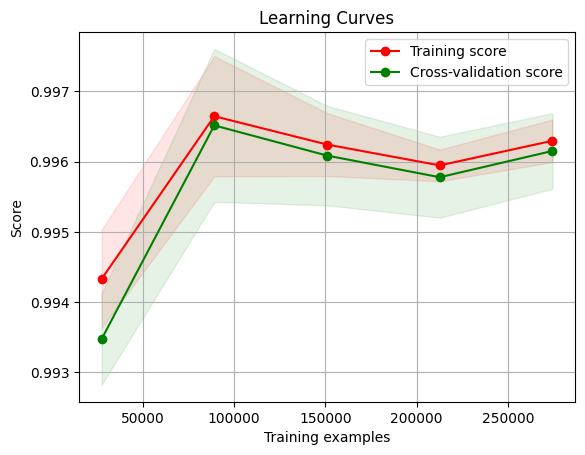

In [ ]:
plt = plot_learning_curves(catboost_model, X_train, y_train)
plt.show()